# 데이터 전처리
---




In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/sample data/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [2]:
# 결측치 확인
pd.DataFrame(df.isnull().sum(), columns=["결측치 개수"]) 

,결측치 개수
Unnamed: 0,0
Name,0
Platform,0
Year,271
Genre,50
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [3]:
# 결측치 제거
df = df.dropna() 
df = df.drop(df.columns[[0]], axis =1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [4]:
# Sales 에서 K, M 없애고 단위 통합하기
def value_to_float(x):
  if 'K' in x:
    if len(x)>1:
      return float(x.replace('K',''))*1000
  if 'M' in x:
    if len(x)>1:
      return float(x.replace('M',''))*1000000
  else:
    return float(x)*1000000

df['NA_Sales'] = df['NA_Sales'].apply(value_to_float).astype(int)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float).astype(int)  
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float).astype(int)  
df['Other_Sales'] = df['Other_Sales'].apply(value_to_float).astype(int)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000,90000,0,40000


In [5]:
# Year 에서 연도에 해당하지 않는 숫자 제거 및 재정렬
df['Year'] = df['Year'].astype(int)
df = df.sort_values(by=['Year'], axis=0)
cleaning_year = df[df['Year']<=1900].index
df = df.drop(cleaning_year).reset_index(drop=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Missile Command,2600,1980,Shooter,Atari,2560000,170000,0,30000
1,Checkers,2600,1980,Misc,Atari,220000,10000,0,0
2,Boxing,2600,1980,Fighting,Activision,720000,40000,0,10000
3,Freeway,2600,1980,Action,Activision,320000,20000,0,0
4,Bridge,2600,1980,Misc,Activision,250000,20000,0,0


In [6]:
# 전체시장 출고량 추가
df['Market_Sales'] = df.apply(lambda row: sum([row['NA_Sales'], row['EU_Sales'], row['JP_Sales'], row['Other_Sales']]), axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Market_Sales
0,Missile Command,2600,1980,Shooter,Atari,2560000,170000,0,30000,2760000
1,Checkers,2600,1980,Misc,Atari,220000,10000,0,0,230000
2,Boxing,2600,1980,Fighting,Activision,720000,40000,0,10000,770000
3,Freeway,2600,1980,Action,Activision,320000,20000,0,0,340000
4,Bridge,2600,1980,Misc,Activision,250000,20000,0,0,270000


- 결측치 제거
- 출고량 단위 통일
- 'Year' 데이터에서 연도에 해당하지 않는 숫자 제거
- 전체시장에 대한 출고량 데이터 추가

# 지역별 게임장르 선호도 및 시장점유율
---





### 1. 어떤 장르의 게임을 가장 선호하는가?

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 장르별, 지역별 출고량 합계
df1 = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Market_Sales']]
df1 = df1.groupby([df['Genre']]).sum()
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Market_Sales
Genre,,,,,
Action,855959997,512519997,155730000,183639998,1707849992
Adventure,101330000,63320000,51790000,16640000,233080000
Fighting,220109998,99720000,86390000,36100000,442319998
Misc,394289999,207680000,103710000,72539999,778219998
Platform,442459999,199399999,129219999,51150000,822229997
Puzzle,120999999,50390000,56190000,12390000,239969999
Racing,353569997,234199999,55420000,76230000,719419996
Role-Playing,307079999,176309998,336249999,54710000,874349996
Shooter,570889997,307259997,37340000,100820000,1016309994


In [8]:
df1 = df1.reset_index(drop=False)

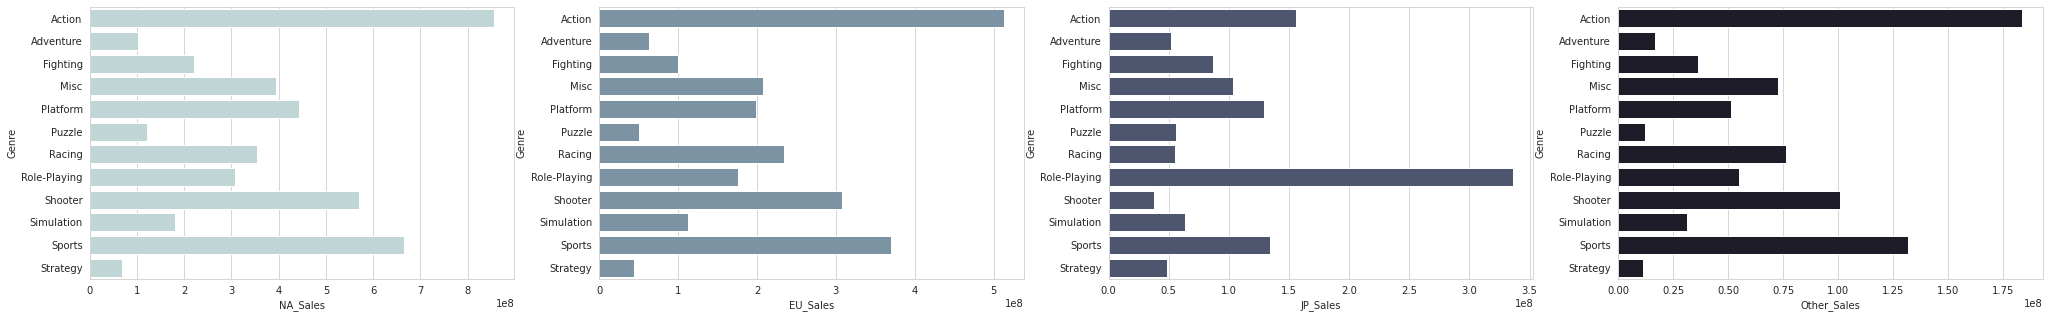

In [9]:
# 장르별, 지역별 출고량 그래프로 표현
fig = plt.figure(figsize=(35,5))
sns.set_style('whitegrid')

area01 = fig.add_subplot(1,4,1)
area02 = fig.add_subplot(1,4,2)
area03 = fig.add_subplot(1,4,3)
area04 = fig.add_subplot(1,4,4)

sns.barplot(x='NA_Sales', y='Genre', color='#BCD8D8', data=df1, ax=area01)
sns.barplot(x='EU_Sales', y='Genre', color='#7494A9', data=df1, ax=area02)
sns.barplot(x='JP_Sales', y='Genre', color='#485275', data=df1, ax=area03)
sns.barplot(x='Other_Sales', y='Genre', color='#1E1A2C', data=df1, ax=area04)
plt.show()

- 지역별 게임장르 출고량은 일본을 제외한 지역에서 Action, Sports, Shooter 순으로 높게 나왔다.

In [10]:
df2 = df1.T
df2

,0,1,2,3,4,5,6,7,8,9,10,11
Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
NA_Sales,855959997,101330000,220109998,394289999,442459999,120999999,353569997,307079999,570889997,181039998,664329996,67820000
EU_Sales,512519997,63320000,99720000,207680000,199399999,50390000,234199999,176309998,307259997,112680000,369689999,44700000
JP_Sales,155730000,51790000,86390000,103710000,129219999,56190000,55420000,336249999,37340000,63460000,134579999,48130000
Other_Sales,183639998,16640000,36100000,72539999,51150000,12390000,76230000,54710000,100820000,31240000,131729999,11200000
Market_Sales,1707849992,233080000,442319998,778219998,822229997,239969999,719419996,874349996,1016309994,388419998,1300329993,171850000


In [11]:
df2 = df2.reset_index(drop=False)
new_header = df2.iloc[0]
df2.columns = new_header
df2 = df2[1:]
df2 = df2.rename(columns = {'Genre' : 'Sales'})
df2.head()

,Sales,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
1,NA_Sales,855959997,101330000,220109998,394289999,442459999,120999999,353569997,307079999,570889997,181039998,664329996,67820000
2,EU_Sales,512519997,63320000,99720000,207680000,199399999,50390000,234199999,176309998,307259997,112680000,369689999,44700000
3,JP_Sales,155730000,51790000,86390000,103710000,129219999,56190000,55420000,336249999,37340000,63460000,134579999,48130000
4,Other_Sales,183639998,16640000,36100000,72539999,51150000,12390000,76230000,54710000,100820000,31240000,131729999,11200000
5,Market_Sales,1707849992,233080000,442319998,778219998,822229997,239969999,719419996,874349996,1016309994,388419998,1300329993,171850000


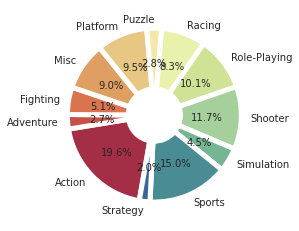

In [12]:
Sales_sum = df1['Market_Sales'].sum()
Genre_sum = df2[['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing',
                 'Role-Playing','Shooter','Simulation','Sports','Strategy']].sum()
Genre_share = (Genre_sum/Sales_sum)*100

Genre_labels = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing',
                 'Role-Playing','Shooter','Simulation','Sports','Strategy']
colors = ['#A32E45','#C55149','#DA744F','#DF9F62','#E7C782','#F2E9A8','#EAF1AC','#CFE295','#A5D09B','#75B593','#4A8C93','#3C6696']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(Genre_share, labels=Genre_labels, autopct='%.1f%%', startangle=260, counterclock=False, colors= colors, wedgeprops=wedgeprops)
plt.show()

### 3. 지역별 시장점유율

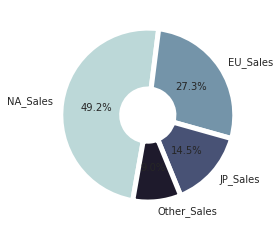

In [13]:
Market_sum = df1[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Market_share = (Market_sum/Sales_sum)*100

Market_labels = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
Market_colors = ['#BCD8D8','#7494A9','#485275','#1E1A2C']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(Market_share, labels=Market_labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=Market_colors, wedgeprops=wedgeprops)
plt.show()

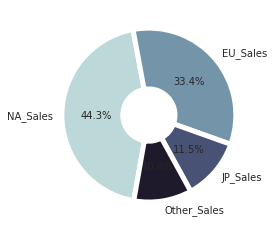

In [14]:
# 최근 10년 지역별 시장점유율
df_10y = df[df['Year']>=2010]
Sales_sum_10y = df_10y['Market_Sales'].sum()
Market_sum_10y = df_10y[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
Market_share_10y = (Market_sum_10y/Sales_sum_10y)*100

plt.pie(Market_share_10y, labels=Market_labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=Market_colors, wedgeprops=wedgeprops)
plt.show()

# 연도별 게임 트렌드
---



### 1. 연도별 게임장르 출시 개수



In [15]:
# 연도별 게임장르 출시 개수 계산
Genre_count = df[['Year', 'Genre']].value_counts()
df3 = pd.DataFrame(data=Genre_count, columns=['GenreCount'])
df3 = df3.reset_index(drop=False)
df3.head()

,Year,Genre,GenreCount
0,2009,Action,270
1,2012,Action,263
2,2015,Action,250
3,2011,Action,238
4,2010,Action,226


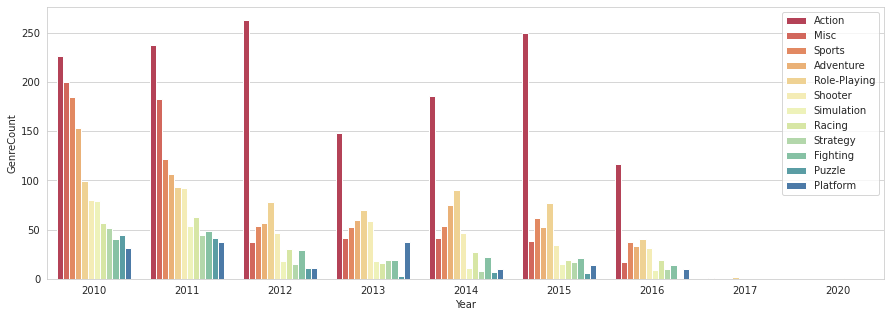

In [16]:
# 최근 10년 연도별 게임장르 출시
df3 = df3[df3['Year']>=2010]
plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='GenreCount', hue='Genre', palette='Spectral', data=df3)
plt.legend(loc='upper right')
plt.show()

### 2. 연도별 게임장르 출고량




In [17]:
Sales = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Market_Sales']]
df4 = Sales.groupby([df['Year'], df['Genre'],df['Platform']]).sum()
df4 = df4.reset_index(drop=False)
df4

,Year,Genre,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Market_Sales
0,1980,Action,2600,320000,20000,0,0,340000
1,1980,Fighting,2600,720000,40000,0,10000,770000
2,1980,Misc,2600,2530000,150000,0,20000,2700000
3,1980,Shooter,2600,6560000,430000,0,80000,7070000
4,1981,Action,2600,13860000,810000,0,120000,14790000
...,...,...,...,...,...,...,...,...
1794,2016,Strategy,XOne,10000,10000,0,0,20000
1795,2017,Action,PSV,0,0,10000,0,10000
1796,2017,Role-Playing,PS4,0,0,30000,0,30000
1797,2017,Role-Playing,PSV,0,0,10000,0,10000


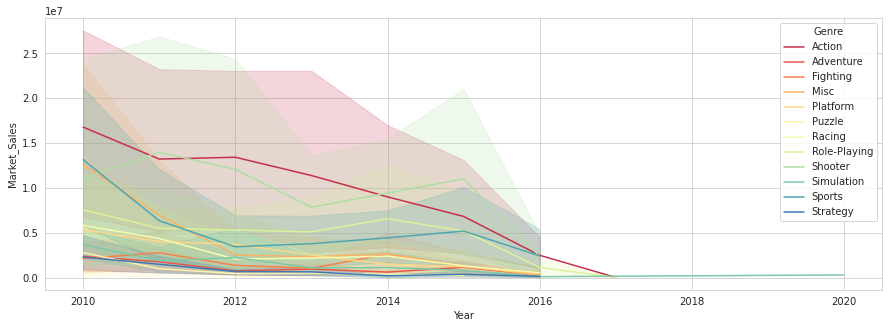

In [18]:
# 최근 10년 연도별 게임장르 출고량
df4 = df4[df4['Year']>=2010]
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='Market_Sales', hue='Genre', palette='Spectral', data=df4)
plt.show()

### 3. 연도별 플랫폼 출시 개수

In [19]:
# 연도별 플랫폼 출시 개수 계산
Platform_count = df[['Year', 'Platform']].value_counts()
df5 = pd.DataFrame(data=Platform_count, columns=['PlatformCount'])
df5 = df5.reset_index(drop=False)
df5

,Year,Platform,PlatformCount
0,2008,DS,488
1,2009,DS,402
2,2007,DS,376
3,2009,Wii,323
4,2010,DS,323
...,...,...,...
236,2002,N64,1
237,2002,DC,1
238,1999,SNES,1
239,2000,XB,1


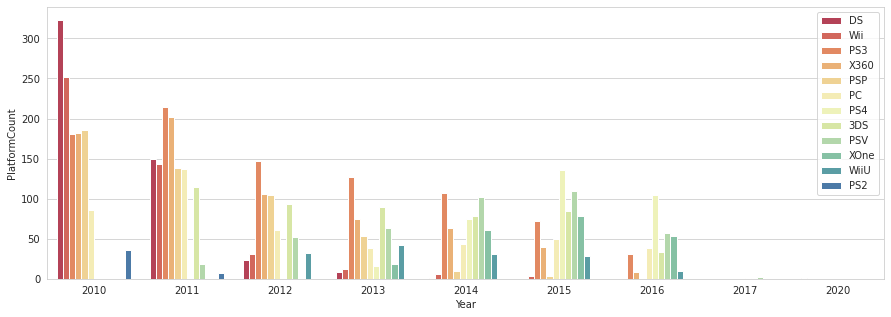

In [20]:
# 최근 10년 연도별 플랫폼 출시
df5 = df5[df5['Year']>=2010]
plt.figure(figsize=(15,5))
sns.barplot(x='Year', y='PlatformCount', hue='Platform', palette='Spectral', data=df5)
plt.legend(loc='upper right')
plt.show()

### 4. 연도별 플랫폼 출고량

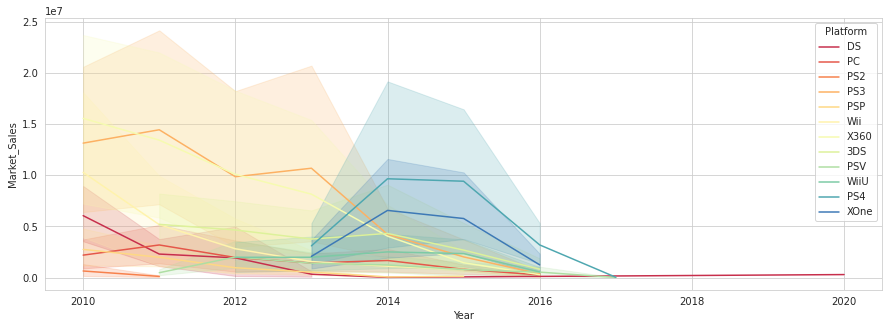

In [21]:
# 최근 10년 연도별 플랫폼 출고량
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='Market_Sales', hue='Platform', palette='Spectral', data=df4)
plt.show()

- 

# 출고량이 높은 게임에 대한 분석
---




### 1. 장르별 출고량

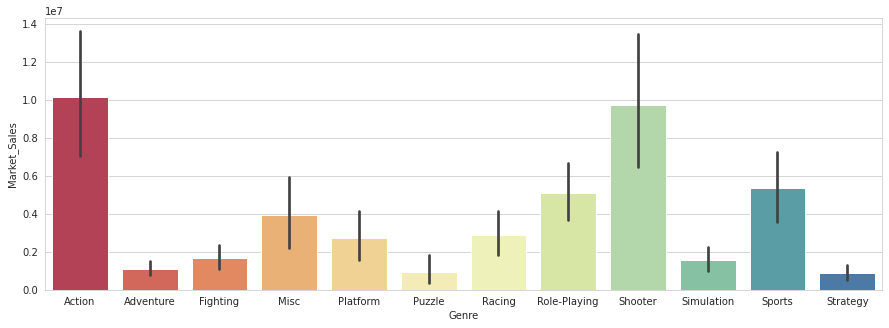

In [22]:
# 장르별 출고량
plt.figure(figsize=(15,5))
sns.barplot(x='Genre', y='Market_Sales', palette='Spectral', data=df4)
plt.show()

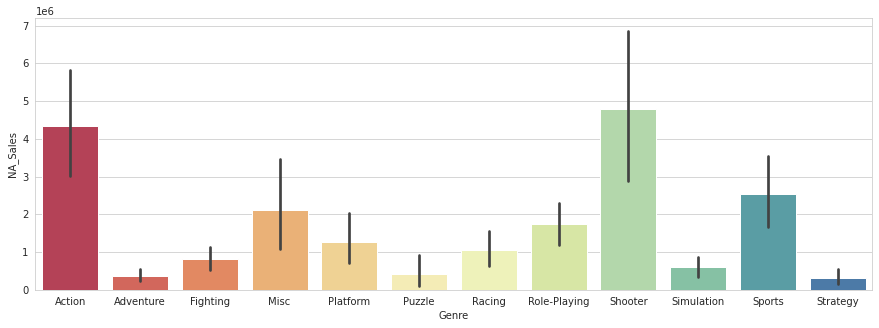

In [23]:
# 장르별 북미시장 출고량
plt.figure(figsize=(15,5))
sns.barplot(x='Genre', y='NA_Sales', palette='Spectral', data=df4)
plt.show()

### 2. 플랫폼별 출고량

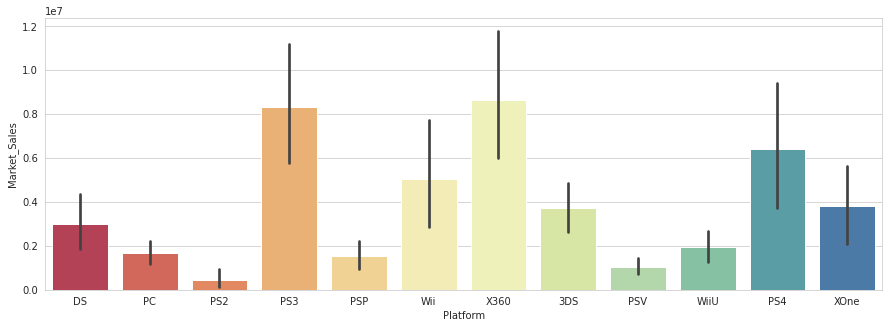

In [24]:
# 플랫폼별 출고량
plt.figure(figsize=(15,5))
sns.barplot(x='Platform', y='Market_Sales', palette='Spectral', data=df4)
plt.show()

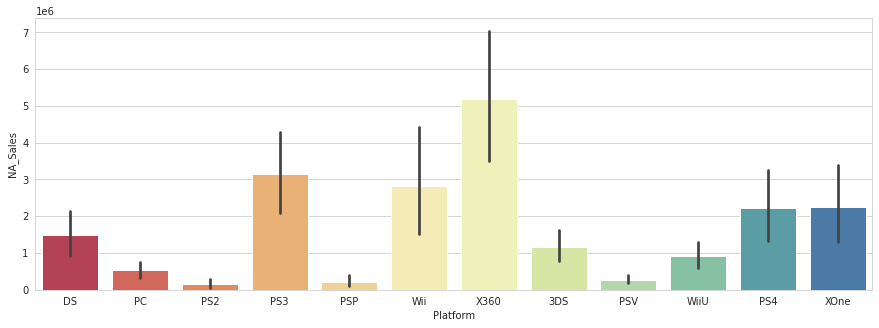

In [25]:
# 플랫폼별 북미시장 출고량
plt.figure(figsize=(15,5))
sns.barplot(x='Platform', y='NA_Sales', palette='Spectral', data=df4)
plt.show()

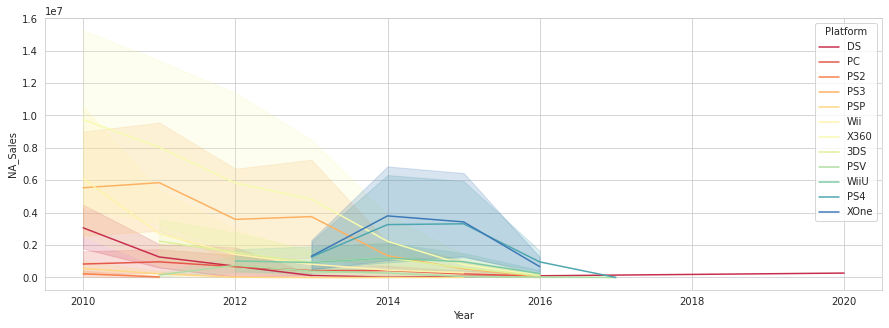

In [26]:
# 연도별 북미시장 플랫폼 출고량
plt.figure(figsize=(15,5))
sns.lineplot(x='Year', y='NA_Sales', hue='Platform', palette='Spectral', data=df4)
plt.show()

- 최근 10년간의 데이터에서도 북미시장의 시장점유율 가장 높음
- 출시되는 장르는 여전히 Action 게임이 많음
- 전체시장에서의 출고량은 Action 게임이 가장 많았지만 Shooter 게임도 두번째로 높음
- 시장점유율이 가장 높은 북미시장을 확인해 본 결과 북미에서는 Shooter 게임의 출고량이 가장 높은 것으로 확인
- 플랫폼의 경우 트랜드의 변화가 크기 때문에 가장 최신의 트랜드를 따르는 것이 경쟁력이 있다고 판단